In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (13, 10)

sns.set(style="whitegrid")

In [2]:
events_dtypes = {'event_id': 'category', 'ref_type': 'category', 'ref_hash': 'category', 'application_id': 'category',
                   'attributed': 'category', 'device_countrycode': 'category', 'device_os_version': 'category',
                   'device_brand' : 'category', 'device_model' : 'category', 'device_city': 'category', 'session_user_agent': 'category', 'user_agent': 'category', 'carrier': 'category',
                   'kind': 'category', 'device_os' : 'category', 'wifi': 'category', 'connection_type': 'category',
                   'device_language': 'category'}

In [3]:
events = pd.read_csv('events.csv', dtype = events_dtypes, low_memory=False)

events["date"] =  pd.to_datetime(events["date"], errors = "coerce")

## ¿Cuáles son las tres aplicaciones más usadas y cómo es la evolución de los eventos realizados sobre ellas por hora?

In [4]:
indices_aplicaciones_top = list(events['application_id'].value_counts().head(3).index)

In [5]:
indices_aplicaciones_top

['66', '64', '145']

In [7]:
aplicaciones_mas_navegadas = events.loc[events['application_id'].isin(indices_aplicaciones_top), ['application_id']]

In [8]:
aplicaciones_mas_navegadas['Cantidad de eventos'] = 1
agrupacion_aplicaciones_top = aplicaciones_mas_navegadas.groupby('application_id').agg({'Cantidad de eventos':'count'})

In [9]:
eventos_por_hora = events.loc[events['application_id'].isin(indices_aplicaciones_top), ['date', 'application_id']]

In [10]:
eventos_por_hora['Hora'] = eventos_por_hora['date'].dt.hour

In [11]:
eventos_por_hora['cant_eventos'] = 1
agrup_eventos_por_hora = eventos_por_hora.groupby(['Hora','application_id']).agg({'cant_eventos': 'count'})

Text(0.5, 0, 'Hora')

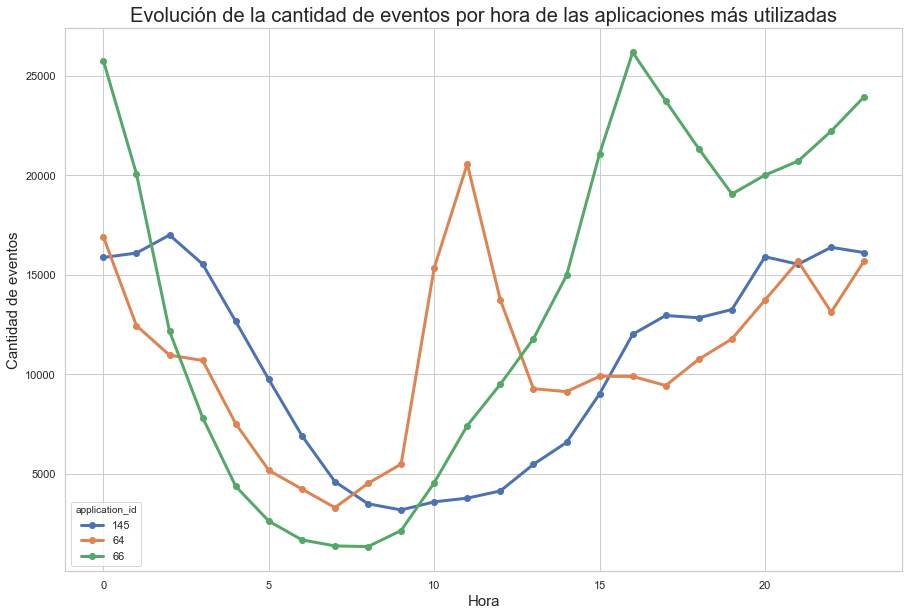

In [22]:
plot = agrup_eventos_por_hora.unstack().cant_eventos.plot(figsize = (15,10), linewidth = 3, style='-o')
plot.set_title('Evolución de la cantidad de eventos por hora de las aplicaciones más utilizadas', fontsize = 20)
plot.set_ylabel('Cantidad de eventos', fontsize = 15)
plot.set_xlabel('Hora', fontsize = 15)

#### Con la visualización mostrada arriba, vimos un patrón que se repetía para las tres aplicaciones. A partir de las 0hs, disminuyó considerablemente la cantidad de eventos realizados sobre ellas. Decidimos profundizar sobre este tópico analizando la distribución por hora y día de los eventos.

## ¿Cómo se distribuyeron los eventos por hora y por día?

In [23]:
events['Hora'] = events['date'].dt.hour
events['dia_de_la_semana'] = events['date'].dt.dayofweek
events['cant_eventos'] = 1

In [24]:
events['Dia'] = events['date'].dt.day

In [25]:
drop_index = list(events.loc[events['date'].dt.day.isin([12,13])].index)  #borramos los eventos del día 12 y 13

In [26]:
week_events = events.drop(drop_index, axis = 0)

In [27]:
group_events = week_events.groupby(['Hora', 'dia_de_la_semana']).agg({'cant_eventos': 'count'})

In [28]:
group_events_unstacked = group_events.unstack()['cant_eventos'] 
group_events_unstacked = group_events_unstacked.fillna(0)

In [29]:
group_events_unstacked.columns = ['Lunes', 'Martes', 'Miercoles', 'Jueves','Viernes','Sabado', 'Domingo']

Text(0.5, 66.5, 'Hora')

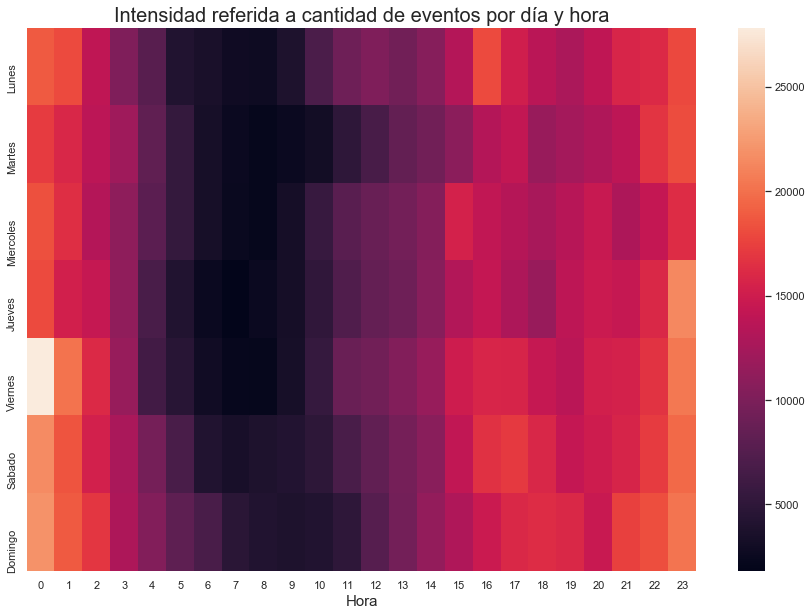

In [33]:
plt.rcParams['figure.figsize'] = (15, 10)

plot = sns.heatmap(group_events_unstacked.T)
plot.set_title("Intensidad referida a cantidad de eventos por día y hora", fontsize = 20)
plot.set_xlabel("Hora", fontsize = 15)

### ¿Cuál es el porcentaje de eventos atribuidos a Jampp por hora?

In [34]:
events2 = pd.read_csv('events.csv', dtype = events_dtypes, low_memory=False)

events2["date"] =  pd.to_datetime(events2["date"], errors = "coerce")

In [35]:
events2['Hora'] = events2['date'].dt.hour
events2['cant_ocurrencias'] = 1

In [36]:
eventos_atribuidos = events2.loc[events2['attributed'] == 'True']
group_eventos_atribuidos = eventos_atribuidos.groupby('Hora').agg({'cant_ocurrencias':'count'})

In [37]:
group_eventos = events2.groupby('Hora').agg({'cant_ocurrencias':'count'})

In [38]:
group_eventos_atribuidos['porcentaje'] = (group_eventos_atribuidos['cant_ocurrencias']*100/group_eventos['cant_ocurrencias'])

Text(0.5, 0, 'Hora')

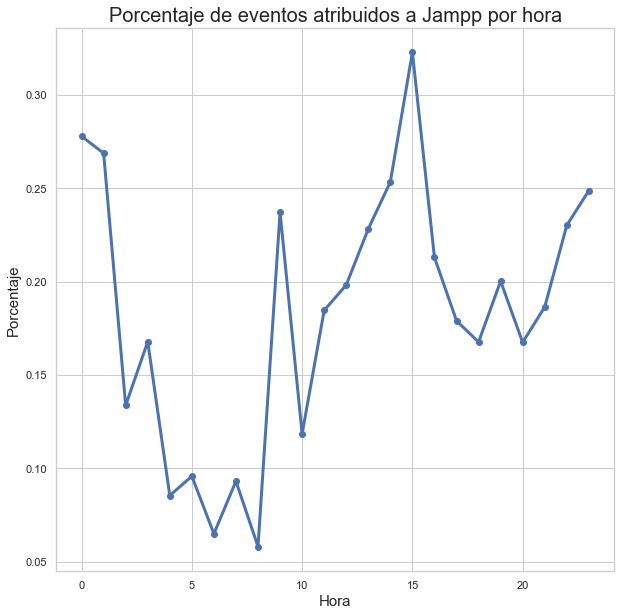

In [40]:
plot = group_eventos_atribuidos.drop(columns = ['cant_ocurrencias']).plot(figsize = (10,10), legend = False, linewidth = 3, style='-o')
plot.set_ylabel("Porcentaje", fontsize = 15)
plot.set_title("Porcentaje de eventos atribuidos a Jampp por hora", fontsize = 20)
plot.set_xlabel("Hora", fontsize = 15)